In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [2]:
df = pd.read_csv("epl_final.csv")
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


In [4]:
df.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000
mean,1.535394,1.182623,0.688273,0.518763,13.617484,10.810661,5.973134,4.693710,6.040299,4.774733,11.276333,11.765672,1.468124,1.792431,0.062473,0.085288
std,1.305432,1.157414,0.835079,0.735357,5.356424,4.696501,3.267954,2.750045,3.110619,2.749541,3.750250,3.924179,1.217190,1.288481,0.253221,0.290183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,9.000000,5.000000,5.000000,43.000000,37.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000


In [5]:
df.isna().sum()

Season               0
MatchDate            0
HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HalfTimeHomeGoals    0
HalfTimeAwayGoals    0
HalfTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [6]:
df["MatchDate"] = pd.to_datetime(df["MatchDate"])

df["Year"] = df["MatchDate"].dt.year
df["Month"] = df["MatchDate"].dt.month
df["Day"] = df["MatchDate"].dt.day

def rolling_team_feature(df, team_col, stat_col, new_col, window=20):
    return df.groupby(team_col)[stat_col].transform(
        lambda x: x.shift().rolling(window=window, min_periods=1).mean()
    )

df["HomeAvgGoalsScored"] = rolling_team_feature(
    df, "HomeTeam", "FullTimeHomeGoals", "HomeAvgGoalsScored"
)
df["AwayAvgGoalsScored"] = rolling_team_feature(
    df, "AwayTeam", "FullTimeAwayGoals", "AwayAvgGoalsScored"
)

df["HomeAvgGoalsConceded"] = rolling_team_feature(
    df, "HomeTeam", "FullTimeAwayGoals", "HomeAvgGoalsConceded"
)
df["AwayAvgGoalsConceded"] = rolling_team_feature(
    df, "AwayTeam", "FullTimeHomeGoals", "AwayAvgGoalsConceded"
)

df["HomeWin"] = (df["FullTimeResult"] == "H").astype(int)
df["AwayWin"] = (df["FullTimeResult"] == "A").astype(int)

df["HomeWinRate"] = rolling_team_feature(df, "HomeTeam", "HomeWin", "HomeWinRate")
df["AwayWinRate"] = rolling_team_feature(df, "AwayTeam", "AwayWin", "AwayWinRate")

df["HomeShotConversion"] = df["FullTimeHomeGoals"] / df["HomeShots"].replace(0, 1)
df["AwayShotConversion"] = df["FullTimeAwayGoals"] / df["AwayShots"].replace(0, 1)

df["HomeDisciplinary"] = df["HomeYellowCards"] + 3 * df["HomeRedCards"]
df["AwayDisciplinary"] = df["AwayYellowCards"] + 3 * df["AwayRedCards"]

df["MatchDayNumber"] = df.groupby("Season").cumcount() + 1

df["SeasonProgress"] = df["MatchDayNumber"] / df.groupby("Season")[
    "MatchDayNumber"
].transform("max")


home_freq = df["HomeTeam"].value_counts(normalize=True)
away_freq = df["AwayTeam"].value_counts(normalize=True)

df["HomeTeamFreqEnc"] = df["HomeTeam"].map(home_freq)
df["AwayTeamFreqEnc"] = df["AwayTeam"].map(away_freq)


df["GoalDifference"] = df["HomeAvgGoalsScored"] - df["AwayAvgGoalsScored"]
df["ExpectedGoalDiff"] = (df["HomeAvgGoalsScored"] - df["AwayAvgGoalsConceded"]) + (
    df["AwayAvgGoalsScored"] - df["HomeAvgGoalsConceded"]
)

df["FormDelta"] = df["HomeWinRate"] - df["AwayWinRate"]

df["HomeAvgShots"] = rolling_team_feature(df, "HomeTeam", "HomeShots", "HomeAvgShots")
df["AwayAvgShots"] = rolling_team_feature(df, "AwayTeam", "AwayShots", "AwayAvgShots")

In [7]:
df['ShotDifference'] = abs(df['HomeShots'] - df['AwayShots'])

df = df.sort_values(by='MatchDate')

# Initialize with zeros
df['HomeAvgGoalsConceded'] = 0.0
df['AwayAvgGoalsConceded'] = 0.0

home_conceded = df.groupby('HomeTeam')['FullTimeAwayGoals'].apply(lambda x: x.shift().expanding().mean())
away_conceded = df.groupby('AwayTeam')['FullTimeHomeGoals'].apply(lambda x: x.shift().expanding().mean())

df['HomeAvgGoalsConceded'] = home_conceded.values
df['AwayAvgGoalsConceded'] = away_conceded.values

df['DefensiveStrengthDifference'] = abs(df['HomeAvgGoalsConceded'] - df['AwayAvgGoalsConceded'])



In [8]:
df.dropna(
    subset=[
        "HomeAvgGoalsScored",
        "AwayAvgGoalsScored",
        "HomeAvgGoalsConceded",
        "AwayAvgGoalsConceded",
        "HomeWinRate",
        "AwayWinRate",
        "HomeShotConversion",
        "AwayShotConversion",
        "HomeDisciplinary",
        "AwayDisciplinary",
        "FullTimeResult",
        "ShotDifference",
        "DefensiveStrengthDifference"

    ],inplace=True
)

In [9]:
features = [
    "HomeAvgGoalsScored",
    "AwayAvgGoalsScored",
    "HomeAvgGoalsConceded",
    "AwayAvgGoalsConceded",
    "HomeWinRate",
    "AwayWinRate",
    "HomeShotConversion",
    "AwayShotConversion",
    "HomeDisciplinary",
    "AwayDisciplinary",
    "SeasonProgress",
    "HomeTeamFreqEnc",
    "AwayTeamFreqEnc",
    "HomeAvgShots",
    "AwayAvgShots",
    "HomeShotsOnTarget",
    "AwayShotsOnTarget",
    "HomeCorners",
    "AwayCorners",
    "HomeFouls",
    "AwayFouls",
    "GoalDifference",
    "ExpectedGoalDiff",
    "FormDelta",
    "ShotDifference",
    "DefensiveStrengthDifference"
]

target = "FullTimeResult"

In [10]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6457, 26)
(2768, 26)
(6457,)
(2768,)


In [11]:
# Applying GradientBoostingClassifier Model

GBCModel = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=33)
GBCModel.fit(X_train, y_train)
# Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
print('----------------------------------------------------')

y_pred = GBCModel.predict(X_test)
print(classification_report(y_test, y_pred))



GBCModel Train Score is :  0.9931856899488927
GBCModel Test Score is :  0.9356936416184971
----------------------------------------------------
              precision    recall  f1-score   support

           A       0.94      0.95      0.94       819
           D       0.89      0.86      0.87       683
           H       0.96      0.97      0.96      1266

    accuracy                           0.94      2768
   macro avg       0.93      0.93      0.93      2768
weighted avg       0.94      0.94      0.94      2768



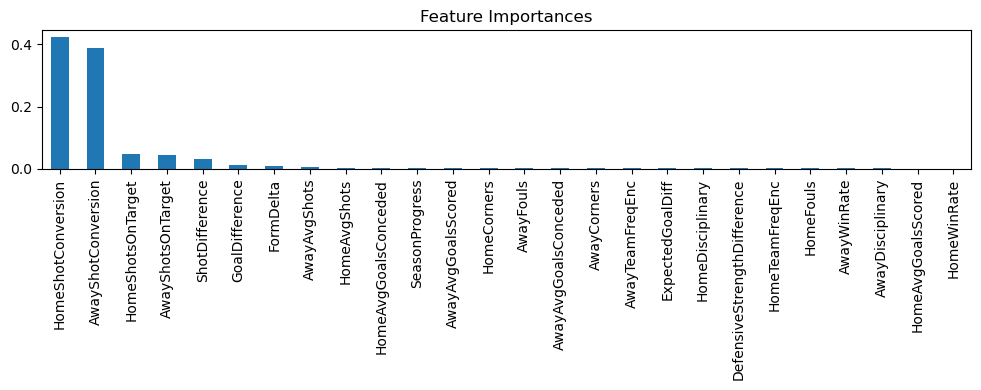

In [12]:
importances = GBCModel.feature_importances_
features = X_train.columns
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

feat_importance.plot(kind='bar', figsize=(10, 4), title='Feature Importances')
plt.tight_layout()
plt.show()


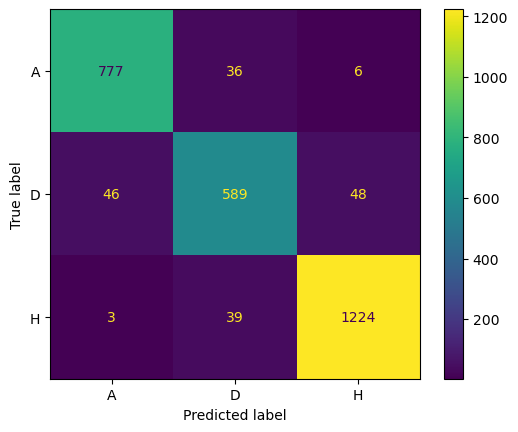

In [13]:
ConfusionMatrixDisplay.from_estimator(GBCModel, X_test, y_test)


In [14]:
# ----------------------------------------------------
# Applying DecisionTreeClassifier Model

DecisionTreeClassifierModel = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=4,max_depth=10,criterion='gini',random_state=42)  
DecisionTreeClassifierModel.fit(X_train, y_train)

# Calculating Details
print(
    "DecisionTreeClassifierModel Train Score is : ",
    DecisionTreeClassifierModel.score(X_train, y_train),
)
print(
    "DecisionTreeClassifierModel Test Score is : ",
    DecisionTreeClassifierModel.score(X_test, y_test),
)
print("----------------------------------------------------")

y_pred = DecisionTreeClassifierModel.predict(X_test)
print(classification_report(y_test, y_pred))


DecisionTreeClassifierModel Train Score is :  0.9495121573486139
DecisionTreeClassifierModel Test Score is :  0.914378612716763
----------------------------------------------------
              precision    recall  f1-score   support

           A       0.93      0.92      0.92       819
           D       0.84      0.86      0.85       683
           H       0.94      0.94      0.94      1266

    accuracy                           0.91      2768
   macro avg       0.91      0.91      0.91      2768
weighted avg       0.91      0.91      0.91      2768



In [15]:
# ----------------------------------------------------
# Applying MLPClassifier Model

MLPClassifierModel = MLPClassifier(
    activation="logistic",
    solver="adam", 
    learning_rate="constant", 
    max_iter=300,
    hidden_layer_sizes=(100, 50),
    early_stopping=False,
    alpha= 1e-05,
   random_state=42,
)
MLPClassifierModel.fit(X_train, y_train)

# Calculating Details
print(
    "MLPClassifierModel Train Score is : ", MLPClassifierModel.score(X_train, y_train)
)
print("MLPClassifierModel Test Score is : ", MLPClassifierModel.score(X_test, y_test))
print("MLPClassifierModel loss is : ", MLPClassifierModel.loss_)
print("----------------------------------------------------")

y_pred = MLPClassifierModel.predict(X_test)
print(classification_report(y_test, y_pred))


MLPClassifierModel Train Score is :  0.9679417686231996
MLPClassifierModel Test Score is :  0.9530346820809249
MLPClassifierModel loss is :  0.1268986166099452
----------------------------------------------------
              precision    recall  f1-score   support

           A       0.95      0.96      0.96       819
           D       0.91      0.90      0.91       683
           H       0.97      0.98      0.98      1266

    accuracy                           0.95      2768
   macro avg       0.95      0.95      0.95      2768
weighted avg       0.95      0.95      0.95      2768



c:\Users\amrta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# ----------------------------------------------------
# Applying LogisticRegression Model

LogisticRegressionModel = LogisticRegression(
    max_iter=800,solver="saga",penalty="l2", C=10.0, random_state=42,
)
LogisticRegressionModel.fit(X_train, y_train)

# Calculating Details
print(
    "LogisticRegressionModel Train Score is : ",
    LogisticRegressionModel.score(X_train, y_train),
)
print(
    "LogisticRegressionModel Test Score is : ",
    LogisticRegressionModel.score(X_test, y_test),
)
print("----------------------------------------------------")

y_pred = LogisticRegressionModel.predict(X_test)
print(classification_report(y_test, y_pred))

LogisticRegressionModel Train Score is :  0.8211243611584327
LogisticRegressionModel Test Score is :  0.8197254335260116
----------------------------------------------------
              precision    recall  f1-score   support

           A       0.84      0.85      0.84       819
           D       0.69      0.58      0.63       683
           H       0.86      0.93      0.90      1266

    accuracy                           0.82      2768
   macro avg       0.80      0.79      0.79      2768
weighted avg       0.81      0.82      0.81      2768



c:\Users\amrta\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [18]:
# ----------------------------------------------------
# Applying MLPClassifier Model

MLPClassifierModel = MLPClassifier(
    activation="logistic",
    solver="adam", 
    learning_rate="constant", 
    max_iter=300,
    hidden_layer_sizes=(100, 50),
    early_stopping=False,
    alpha= 1e-05,
   random_state=42,
)
MLPClassifierModel.fit(X_resampled, y_resampled)

# Calculating Details
print(
    "MLPClassifierModel Train Score is : ", MLPClassifierModel.score(X_resampled, y_resampled)
)
print("MLPClassifierModel Test Score is : ", MLPClassifierModel.score(X_test, y_test))
print("MLPClassifierModel loss is : ", MLPClassifierModel.loss_)
print("----------------------------------------------------")

y_pred = MLPClassifierModel.predict(X_test)
print(classification_report(y_test, y_pred))


MLPClassifierModel Train Score is :  0.9621981494019408
MLPClassifierModel Test Score is :  0.9483381502890174
MLPClassifierModel loss is :  0.13359713182905847
----------------------------------------------------
              precision    recall  f1-score   support

           A       0.97      0.94      0.95       819
           D       0.89      0.91      0.90       683
           H       0.97      0.97      0.97      1266

    accuracy                           0.95      2768
   macro avg       0.94      0.94      0.94      2768
weighted avg       0.95      0.95      0.95      2768



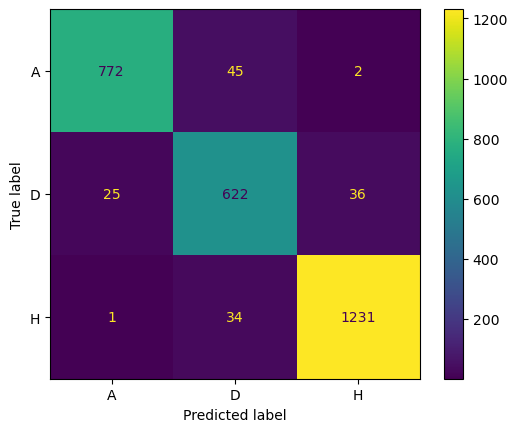

In [19]:
ConfusionMatrixDisplay.from_estimator(MLPClassifierModel, X_test, y_test)


In [ ]:
joblib.dump(MLPClassifierModel, 'football_result_model.pkl')


['C:\\Users\\amrta\\OneDrive\\Desktop\\Kora\\football_result_model.pkl']

## Project Summary

### Objective

This project aimed to predict the outcome of English Premier League matches—**Home win (H)**, **Draw (D)**, or **Away win (A)**—using historical match data and machine learning techniques.

---

### Methodology

Comprehensive feature engineering was applied to capture team performance, form trends, and match context. Models were trained on a balanced dataset using techniques such as rolling averages, form deltas, shot efficiency, and class balancing (SMOTE).

Multiple classifiers were evaluated, with the **MLP Classifier** achieving the best performance.

---

### Final Model Performance

* **Accuracy:** 94.8%
* **Balanced F1-Score:** \~0.94
* **Confusion Matrix Highlights:**

  * **Home wins:** 1231 correctly predicted
  * **Draws:** 622 correctly predicted
  * **Away wins:** 772 correctly predicted

The model demonstrates strong predictive capability across all classes, including the often challenging draw class.

---

### Conclusion

The final model offers accurate and reliable predictions of EPL match outcomes. Future enhancements could include refining feature timelines to eliminate target leakage and incorporating additional contextual data.